In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
R = np.array([
    [-1., 1],
    [0, 0],
    [1, 1],
])

In [4]:
displ = np.sum(R,0)
R -= displ/R.shape[0]

In [5]:
springs = [(0,1), (1, 2)]

In [6]:
N, k = R.shape

In [7]:
H = np.zeros((N,k,N,k))

for i, (start_,stop_) in enumerate(springs):
    v = (R[stop_]-R[start_]).reshape(-1,1)
    for start, stop in [(start_,stop_),(stop_,start_)]:
        H[start,:,start,:] += v@v.T*np.sign(v[0,0])
        H[stop,:,start,:] += -v@v.T*np.sign(v[0,0])

H = H.reshape(N*k,N*k)

In [8]:
H.round(3)

array([[ 1., -1., -1.,  1.,  0.,  0.],
       [-1.,  1.,  1., -1.,  0.,  0.],
       [-1.,  1.,  2.,  0., -1., -1.],
       [ 1., -1.,  0.,  2., -1., -1.],
       [ 0.,  0., -1., -1.,  1.,  1.],
       [ 0.,  0., -1., -1.,  1.,  1.]])

In [9]:
%run ../calculating.ipynb

In [10]:
I = inertiaAxes2d(R[:,0], R[:,1])

In [11]:
I_prime, X = np.linalg.eigh(I)

In [12]:
D = zeroModes2d(R, X)

In [13]:
%run ../plotting.ipynb

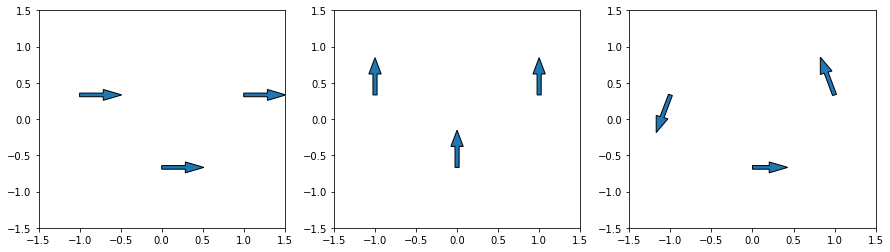

In [14]:
plot(R, D)

In [15]:
l, v = np.linalg.eigh(H)

In [16]:
v = v.T

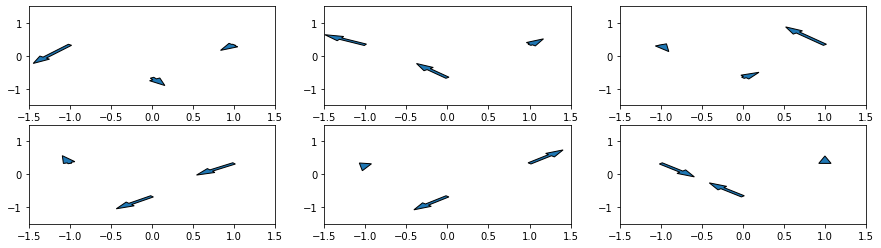

In [17]:
plot(R, v)

In [18]:
l.round(3)

array([-0., -0.,  0.,  0.,  4.,  4.])

In [19]:
for i in range(len(v)):
    tmp = v[i]
    for j in range(len(D)):
        tmp -= D[j]*(D[j]@tmp)
    norm = np.linalg.norm(tmp)
    if norm<1e-4: 
        print(i)
        continue
    else:
        D = np.append(D, (tmp/norm)[np.newaxis,:], 0)

1
2
3


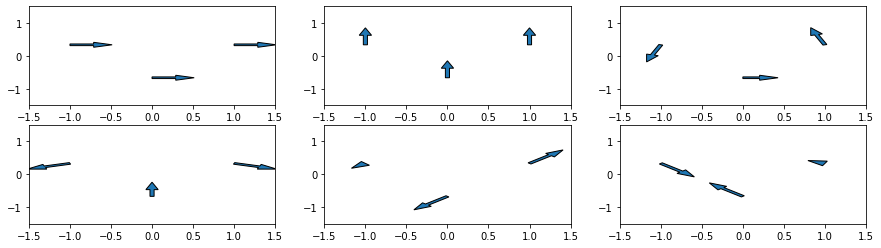

In [20]:
plot(R, D)